In [32]:
import numpy as np
import xarray as xr
import projections as prj

# Load a sample dataset with lat, lon, and time
ds_all = xr.open_dataset('/media/data_HDD/joaop/MHW_detection/data/mhw_hobday_data/mhw_2018.nc')
ds_all = ds_all.drop_vars('category')

if 'latitude' in ds_all.coords: ds_all = ds_all.rename({'latitude': 'lat'})
if 'longitude' in ds_all.coords: ds_all = ds_all.rename({'longitude': 'lon'})

ds = ds_all.isel(time = slice(0,10))#, lat = slice(0,4), lon = slice(0,4))

min_intensity = 0.2
ds = xr.where((ds < min_intensity) | np.isnan(ds), 0, 1)

lat = ds['lat'].values 
lon = ds['lon'].values 

# Create a meshgrid for lat/lon
lat_grid, lon_grid = np.meshgrid(lat, lon)

varname='intensity'

SINUSOIDAL PROJECTION

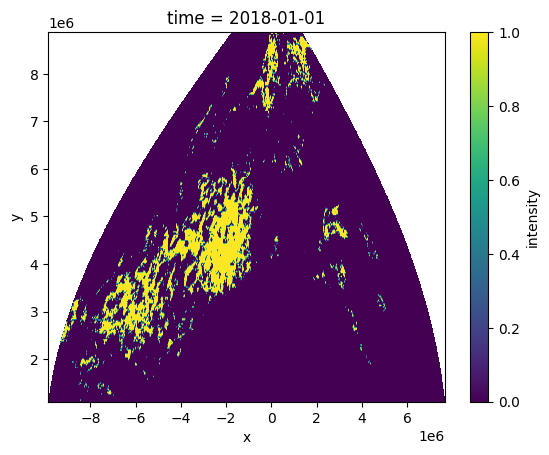

In [33]:
# Reproject the raster data
projected_ds, _, _ = prj.reproject_raster(ds, varname, cell_size_km=10)
projected_ds.isel(time=0).intensity.plot()

In [31]:
reprojected_ds = prj.reproject_raster_back2latlon(projected_ds, ds, varname)
reprojected_ds.isel(time=0).intensity.plot(cmap='viridis', vmin=0, vmax=1)

KeyError: 'lat'

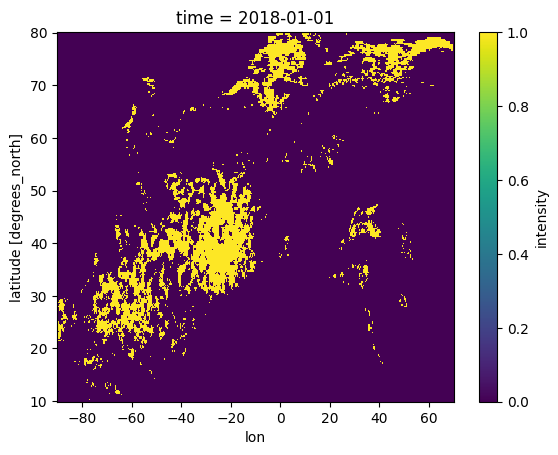

In [4]:
ds.isel(time=0).intensity.plot()

In [1]:
import xarray as xr

In [46]:
ds_test=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/test_in.nc')
ds_test

<xarray.Dataset>
Dimensions:    (time: 21, x: 1755, y: 778)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-01-21
  * x          (x) float64 -9.868e+06 -9.858e+06 ... 7.662e+06 7.672e+06
  * y          (y) float64 1.106e+06 1.116e+06 1.126e+06 ... 8.866e+06 8.876e+06
Data variables:
    intensity  (time, y, x) uint8 ...

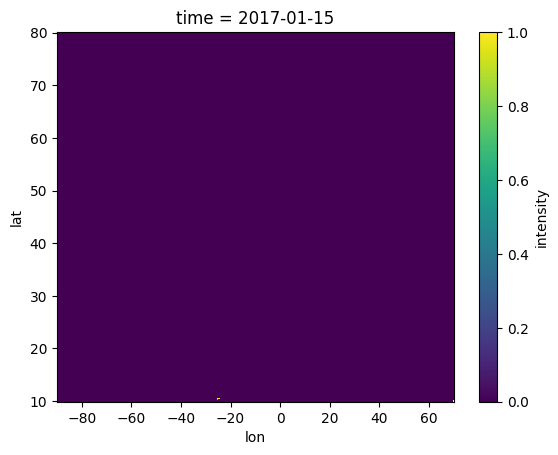

In [51]:
reprojected_ds = prj.reproject_raster_back2latlon(ds_test, ds_in, varname)
reprojected_ds.isel(time=14).intensity.plot(cmap='viridis', vmin=0, vmax=1)

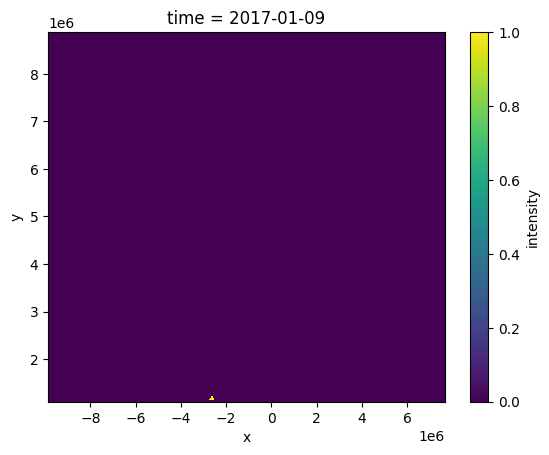

In [21]:
ds.intensity.isel(time=8).plot()

In [24]:
import pickle
with open("/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/test_out.pkl", "rb") as file:
    var_out = pickle.load(file)

var_out

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

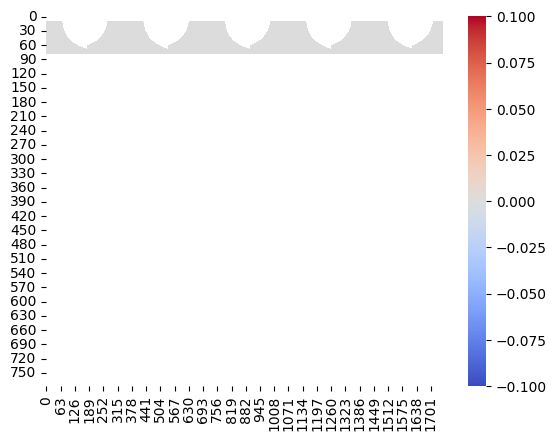

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(var_out, annot=False, cmap="coolwarm")
plt.show()

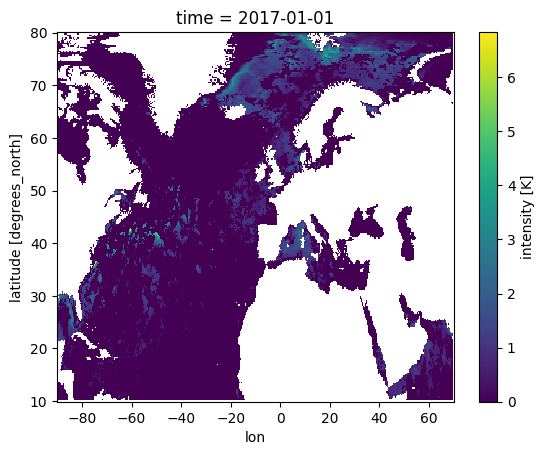

In [37]:
ds_in=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/b4_proj.nc')
if 'latitude' in ds_in.coords: ds_in = ds_in.rename({'latitude': 'lat'})
if 'longitude' in ds_in.coords: ds_in = ds_in.rename({'longitude': 'lon'})

ds_in.intensity.isel(time=0).plot()

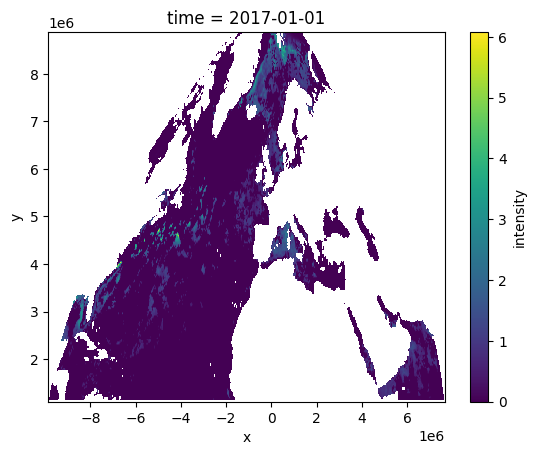

In [35]:
ds_out=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/after_proj.nc')
ds_out.intensity.isel(time=0).plot()

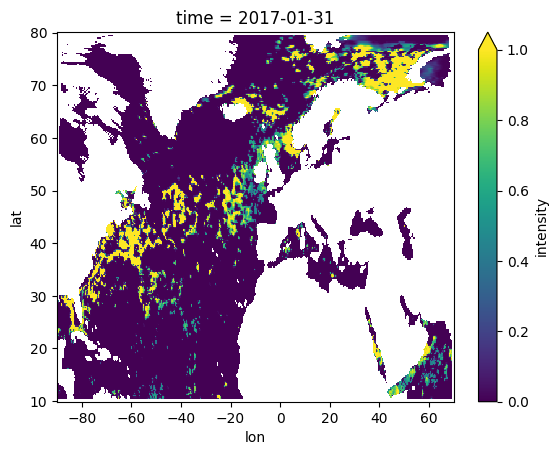

In [45]:
reprojected_ds = prj.reproject_raster_back2latlon(ds_out, ds_in, varname)
reprojected_ds.isel(time=-1).intensity.plot(cmap='viridis', vmin=0, vmax=1)

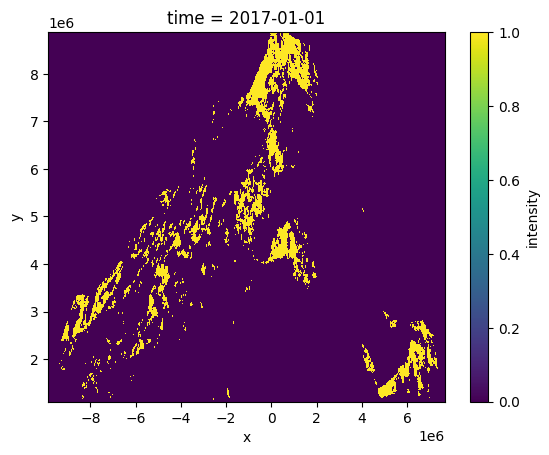

In [30]:
ds=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/after_quantize.nc')
ds.intensity.isel(time=0).plot()

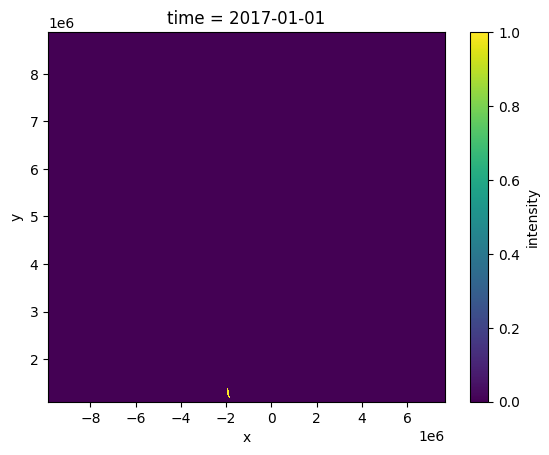

In [53]:
ds_proj=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/ds_proj.nc')
if 'latitude' in ds_proj.coords: ds_proj = ds_proj.rename({'latitude': 'lat'})
if 'longitude' in ds_proj.coords: ds_proj = ds_proj.rename({'longitude': 'lon'})

ds_proj.intensity.isel(time=0).plot()

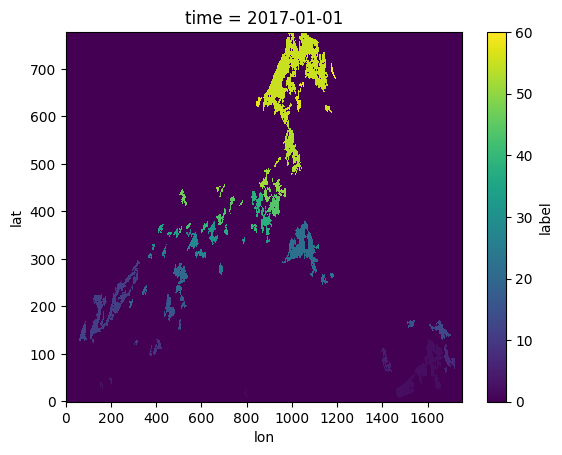

In [57]:
ds_original=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/ds_original.nc')
if 'latitude' in ds_original.coords: ds_original = ds_original.rename({'latitude': 'lat'})
if 'longitude' in ds_original.coords: ds_original = ds_original.rename({'longitude': 'lon'})

ds_original.label.isel(time=0).plot()

In [8]:
ds=xr.open_dataset('/home/joaop/dev/JP/PROJECTS/MHW_DETECTION/ObsSea4Clim-MHW_3D_Detection/data/output/events/EV_000004_JAN_2017.nc')
if 'latitude' in ds.coords: ds = ds.rename({'latitude': 'lat'})
if 'longitude' in ds.coords: ds = ds.rename({'longitude': 'lon'})
ds

<xarray.Dataset>
Dimensions:        (time: 23, lat: 281, lon: 641)
Coordinates:
  * time           (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-01-23
  * lat            (lat) float32 10.0 10.25 10.5 10.75 ... 79.25 79.5 79.75 80.0
  * lon            (lon) float32 -90.0 -89.75 -89.5 -89.25 ... 69.5 69.75 70.0
Data variables:
    event          (time, lat, lon) uint8 ...
    pixel_sum      int64 ...
    ID             object ...
    pixel_area_km  int64 ...

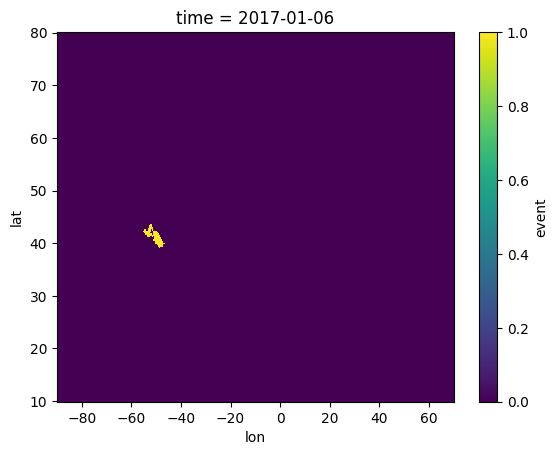

In [9]:
ds.event.isel(time=5).plot()